# LTEM Image Simulation Example

In [6]:
%matplotlib notebook
import numpy as np
import sys 
sys.path.append("../PyTIE/")
from TIE_helper import *
from sim_helper import *

<IPython.core.display.Javascript object>


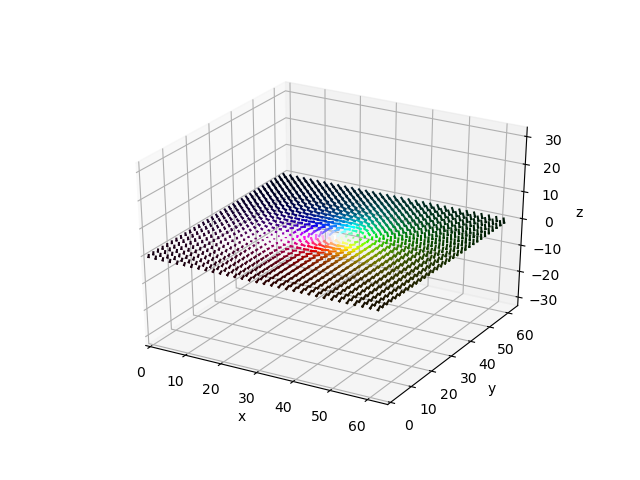

In [7]:
dim = 64
Bloch_x2, Bloch_y2, Bloch_z2 = Lillihook(dim, Q = 1, gamma=3*np.pi/2)
show_3D(Bloch_x2, Bloch_y2, Bloch_z2, show_all = True, l=2, a = 50)

<IPython.core.display.Javascript object>


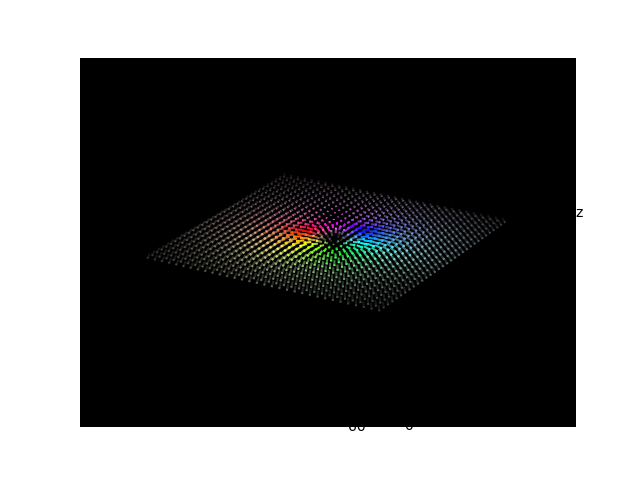

In [8]:
Neel_x, Neel_y, Neel_z = Lillihook(dim, Q = 1, gamma = np.pi)
show_3D(Neel_x, Neel_y, Neel_z, show_all = False, l=2, a = 50)

<IPython.core.display.Javascript object>


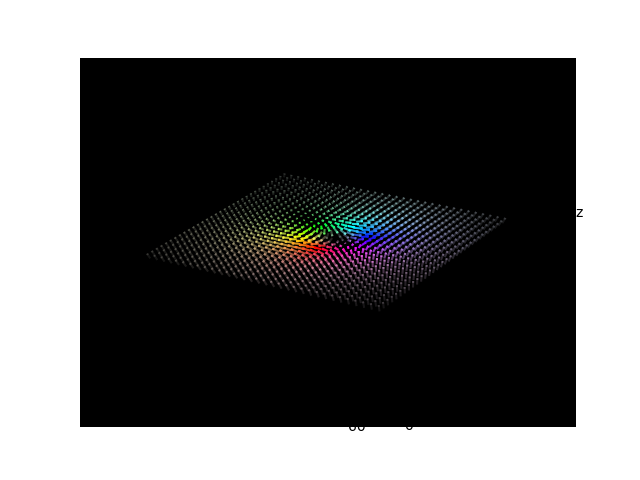

In [9]:
anti_x, anti_y, anti_z = Lillihook(dim, rad=dim//4, Q = -1)
show_3D(anti_x, anti_y, anti_z, show_all = False, l=2, a = 50)

#### Calculating the phase of a Bloch skyrmion with the Mansuripur algorithm  
Only works for 2D magnetizations. Can be applied easily to island structures. std_mansPhi is a a basic example with fixed materials parameters. 

<IPython.core.display.Javascript object>


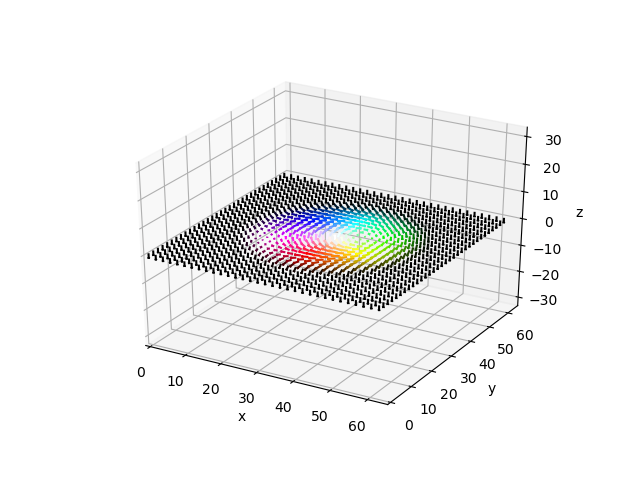

<IPython.core.display.Javascript object>


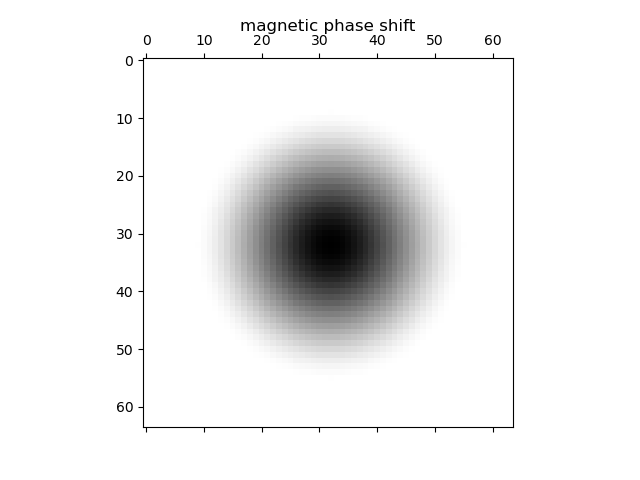

In [10]:
del_px = 10 # nm/pixel
Bloch_x, Bloch_y, Bloch_z = Bloch(dim, chirality = 'cw', pad = True, ir=0)
show_3D(Bloch_x, Bloch_y, Bloch_z, show_all = True, l=2, a = 50)

ephi, mphi = std_mansPhi(Bloch_x, Bloch_y, Bloch_z, del_px = del_px)
show_im(mphi, title="magnetic phase shift")

Total fov is 640 nm


<IPython.core.display.Javascript object>


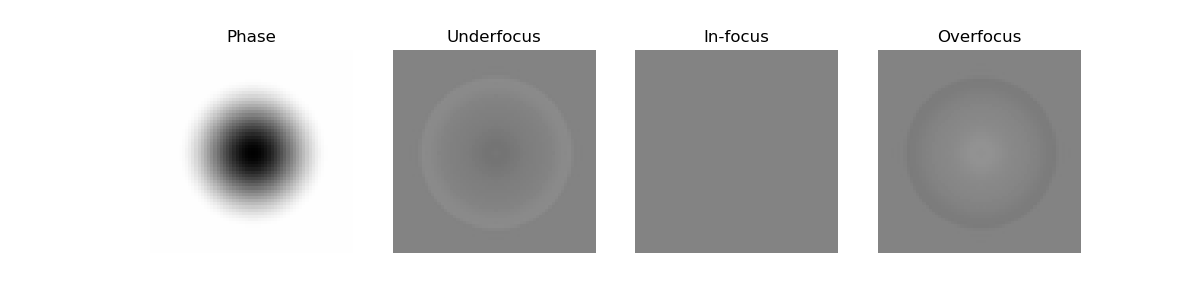

In [11]:
# Simulate LTEM images
defval = 10_000
Tphi, im_ov, im_in, im_un = sim_images(mphi, ephi, 
                                       del_px = del_px, 
                                       def_val = defval)
show_sims(Tphi, im_ov, im_in, im_un)

#### Getting magnetic and electrostatic phase shift with the linear superposition method  
This method works with 3D magnetization structures but is slower. 

In [12]:
del_px = 10
b0 = 1e4 #Gauss default 1e4
phi0 = 2.07e7 #Gauss*nm^2 
cb = b0/phi0*del_px**2 #1/px^2
pre_B = 2*np.pi*cb
ephi_L, mphi_L = linsupPhi(mx=Bloch_x.reshape(dim,dim,1),
                           my=Bloch_y.reshape(dim,dim,1),
                           mz=Bloch_z.reshape(dim,dim,1), 
                           Dshp=np.ones(Bloch_z.reshape(dim,dim,1).shape), 
                           pre_B=pre_B)

nelems =  4096
0.0%
24.4%
48.8%
73.2%
97.7%


Total fov is 640 nm


<IPython.core.display.Javascript object>


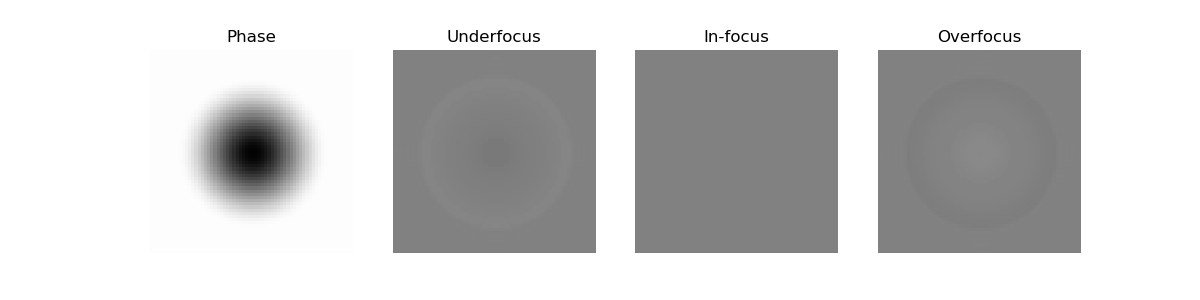

In [13]:
# Simulate LTEM images
Tphi, im_ov, im_in, im_un = sim_images(mphi_L, ephi_L, 
                                       del_px = del_px, 
                                       def_val = defval)
show_sims(Tphi, im_ov, im_in, im_un)

## Reconstructing simulated images

In [14]:
# slightly larger image this time
dim = 512
del_px = 500/dim

Bloch_x, Bloch_y, Bloch_z = Bloch(dim, chirality = 'cw', pad = True)
ephi, mphi = std_mansPhi(Bloch_x, Bloch_y, Bloch_z, del_px = del_px)

defval = 50_000
Tphi, im_ov, im_in, im_un = sim_images(mphi, ephi, 
                                       del_px = del_px, 
                                       def_val = defval)

Total fov is 500.0 nm


Data not given in hypterspy signal class.
You likely need to set ptie.scale (nm/pix).
Current scale: 1.0 nm/pix
Aligning for defocus value:  50000  with no flipped tfs.
Reconstructing with normal Laplacian method
Calling TIE solver



<IPython.core.display.Javascript object>


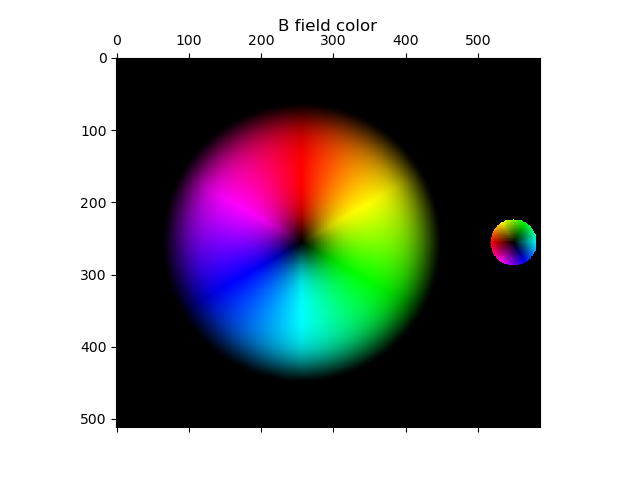

Phase reconstruction completed.


<IPython.core.display.Javascript object>


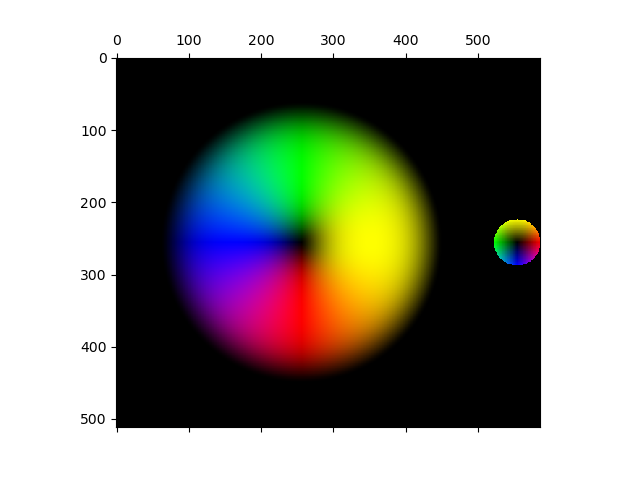

In [16]:
recon_tifs = [im_un, im_in, im_ov]
pscope = Microscope(E=200e3, Cs = 200.0e3, theta_c = 0.01e-3, def_spr = 80.0)
ptie = TIE_params(recon_tifs, [], [defval],
                  flip = False, data_loc = None)
ptie.make_mask()
ptie.scale = del_px

i = 0 
dataname = f'Example_Bloch' 
sym = False
qc = False
save = False

results = TIE(i, ptie, pscope, 
                     dataname = dataname, 
                     sym=sym, 
                     qc = qc, 
                     save=save)

<IPython.core.display.Javascript object>


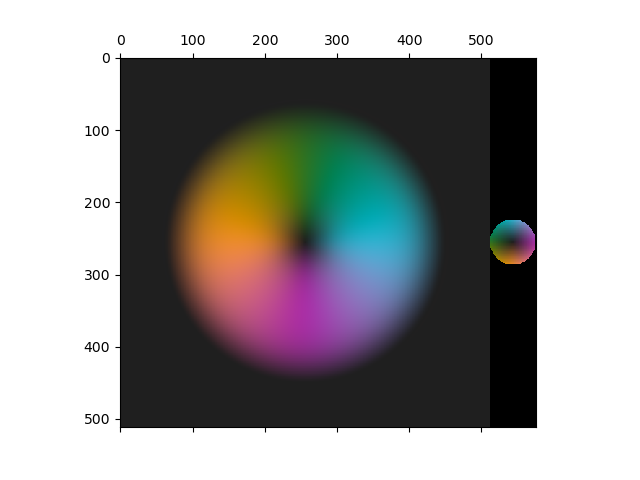

In [18]:
from colorwheel import UniformBicone
show_im(UniformBicone(results['bxt'], results['byt'], 
                      style = 'four', w_cen = False))

--- End Notebook ---